In [1]:
#%pip install pyserial

In [2]:
import serial

In [3]:
def aEntero(secuencia,numBytes,orden='little'):
    si = iter(secuencia)
    try:
        while(True):
            yield int.from_bytes(bytes([next(si) for _ in range(numBytes)]),orden)
    except StopIteration as e:
        pass

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

In [13]:
def tomaLecturas(puerto:str,cantidad:int,ancho:int=2,orden:str='little'):
    with serial.Serial(puerto) as s:
        datos=s.read(ancho*cantidad)
    return np.array([ int.from_bytes(datos[ancho*i:ancho*(i+1)],orden,signed=False) for i in range(cantidad)])

In [30]:
lecturas = tomaLecturas("COM3",4096)

In [31]:
periodograma = scipy.signal.periodogram(lecturas,1000,'hamming')

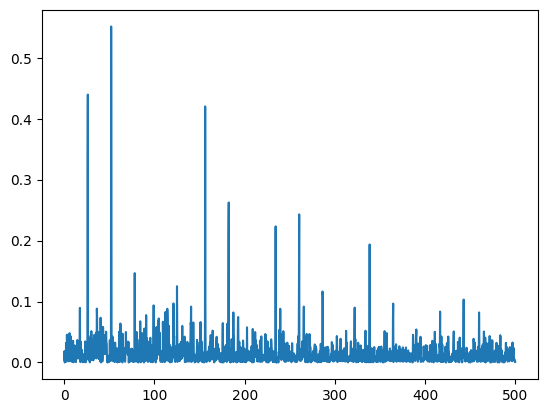

In [32]:
plt.plot(*periodograma)

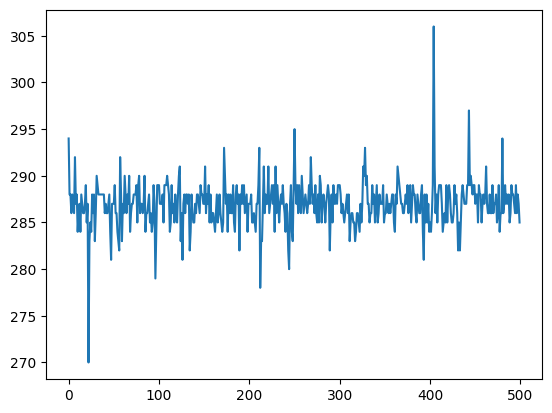

In [36]:
plt.plot(lecturas[:500])